Predict employbility and job placement using candidates past academic parameters 

Unsupervised Learning Technique

Unsupervised Learning Technique

In [ ]:
import pandas as pd

In [ ]:
data_import = pd.read_csv('adult.csv')
data_import

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Data Cleansing

Remove 'race'

Remove education

label encode sex

change 'native_country' to two categories- 'immigrant' or 'non-immigrant'

drop income and store seperately

one hot encode - work_class, marital_status, occupation, relationship

scaling of features

In [ ]:
data_import.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
drop_race_education = data_import.copy()
drop_race_education = drop_race_education.drop(columns=['race', 'education'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encode_sex = drop_race_education
label_encode_sex['sex']= le.fit_transform(label_encode_sex['sex'])

native_country = label_encode_sex
native_country['native_country']= native_country['native_country'].map(lambda x: 0 if x== 'United-states' else 1)

y = native_country['income']
drop_incomes = native_country
drop_incomes = drop_incomes.drop(columns = 'income')

ohe_data = pd.get_dummies(drop_incomes)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ohe_data)

cleaned_data = pd.DataFrame(data = scaled_data, columns = ohe_data.columns)

cleaned_data

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_ ?,workclass_ Federal-gov,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.030671,-1.063611,1.134739,0.703071,0.148453,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927
1,0.837109,-1.008707,1.134739,0.703071,-0.145920,-0.21666,-2.222153,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
2,-0.042642,0.245079,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927
3,1.057047,0.425801,-1.197459,0.703071,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
4,-0.775768,1.408176,1.134739,-1.422331,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,-0.585141,-0.17625,-0.429346,-0.344032,4.445891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-1.422331,-0.145920,-0.21666,-0.197409,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,5.838432,-0.227104,-0.825333,-0.585141,-0.17625,-0.429346,-0.344032,4.445891
32557,0.103983,-0.335433,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
32558,1.423610,-0.358777,-0.420060,-1.422331,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,-0.585141,-0.17625,-0.429346,2.906704,-0.224927
32559,-1.215643,0.110960,-0.420060,0.703071,-0.145920,-0.21666,-1.655225,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,-0.585141,-0.17625,2.329125,-0.344032,-0.224927


Unsupervised learning Modelling

In [ ]:
cleaned_data

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_ ?,workclass_ Federal-gov,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.030671,-1.063611,1.134739,0.703071,0.148453,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927
1,0.837109,-1.008707,1.134739,0.703071,-0.145920,-0.21666,-2.222153,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
2,-0.042642,0.245079,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927
3,1.057047,0.425801,-1.197459,0.703071,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
4,-0.775768,1.408176,1.134739,-1.422331,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,-0.585141,-0.17625,-0.429346,-0.344032,4.445891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-1.422331,-0.145920,-0.21666,-0.197409,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,5.838432,-0.227104,-0.825333,-0.585141,-0.17625,-0.429346,-0.344032,4.445891
32557,0.103983,-0.335433,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
32558,1.423610,-0.358777,-0.420060,-1.422331,-0.145920,-0.21666,-0.035429,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,-0.585141,-0.17625,-0.429346,2.906704,-0.224927
32559,-1.215643,0.110960,-0.420060,0.703071,-0.145920,-0.21666,-1.655225,0.0,-0.24445,-0.174295,...,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,-0.585141,-0.17625,2.329125,-0.344032,-0.224927


In [ ]:
from sklearn.cluster import KMeans

k=2

kmeans = KMeans(n_clusters=k)

y_pred = kmeans.fit_predict(cleaned_data)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

Testing number of clusters

In [ ]:
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []

total_range = range(2, 20)

for i in total_range:

  print(i)

  kmeans = KMeans(n_clusters =i)
  kmeans.fit(cleaned_data)

  sil_scores.append(silhouette_score(cleaned_data, kmeans.labels_))
  inertias.append(kmeans.inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


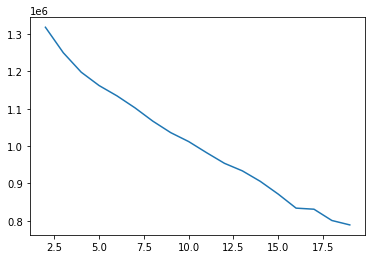

In [10]:
import matplotlib.pyplot as plt

plt.plot(total_range, inertias)

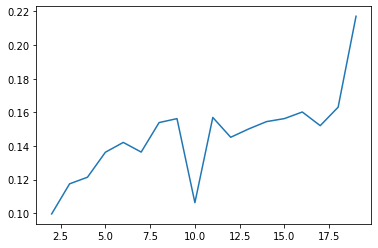

In [11]:
plt.plot(total_range, sil_scores)

In [13]:
kmeans = KMeans(n_clusters = 11)
kmeans.fit(cleaned_data)

sil_scores.append(silhouette_score(cleaned_data, kmeans.labels_))
inertias.append(kmeans.inertia_)

In [14]:
y_pred = kmeans.fit_predict(cleaned_data)
y_pred

array([10,  2,  1, ...,  3,  4,  7], dtype=int32)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
X2D = pca.fit_transform(cleaned_data)
X2D

array([[-1.3150837 ,  0.90922953],
       [ 2.58192363,  1.14965115],
       [-1.22876868, -0.87189689],
       ...,
       [-1.61566664,  1.38287958],
       [-2.59201194, -1.24863767],
       [ 1.6494818 ,  1.74265114]])

In [17]:
pd.concat([pd.DataFrame(data=X2D, columns = ['X', 'Y']), pd.Series(y_pred, name = 'cluster')], axis =1).to_csv('clustering.csv', index=True)

In [18]:
x_points = []
y_points = []

for point in X2D:
  x_points.append(point[0])
  y_points.append(point[1])

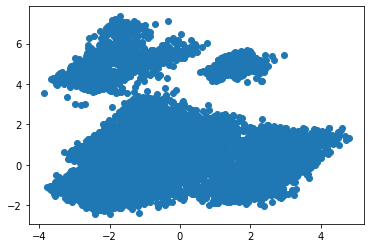

In [19]:
plt.scatter(x_points, y_points)